In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from randomcolor import RandomColor
from typing import Any

In [2]:
def get_prices(day: int) -> pd.DataFrame:
    return pd.read_csv(rf"prices_round_5_day_{day}.csv", sep=';')

def get_trades(day: int) -> pd.DataFrame:
    trade_file = rf"trades_round_5_day_{day}_wn.csv"
    return pd.read_csv(trade_file, sep=";")

In [3]:
days = range(2,5)

trades = [
    "Valentina", "Vinnie", "Vladimir", "Vivian",
    "Celeste", "Colin", "Carlos", "Camilla",
    "Pablo", "Penelope", "Percu", "Petunia",
    "Ruby", "Remy", "Rhianna", "Raj",
    "Amelia", "Adam", "Alina", "Amir",
]

combinations = set()

for day in days:
    trades = get_trades(day)
    for row in trades.itertuples():
        combinations.add((row.buyer, row.seller))
sorted(combinations)

[('Caesar', 'Caesar'),
 ('Caesar', 'Camilla'),
 ('Caesar', 'Gary'),
 ('Caesar', 'Gina'),
 ('Caesar', 'Olivia'),
 ('Caesar', 'Pablo'),
 ('Caesar', 'Paris'),
 ('Caesar', 'Penelope'),
 ('Caesar', 'Peter'),
 ('Camilla', 'Caesar'),
 ('Camilla', 'Camilla'),
 ('Camilla', 'Gary'),
 ('Camilla', 'Gina'),
 ('Camilla', 'Pablo'),
 ('Camilla', 'Paris'),
 ('Camilla', 'Penelope'),
 ('Charlie', 'Caesar'),
 ('Charlie', 'Camilla'),
 ('Charlie', 'Gary'),
 ('Charlie', 'Gina'),
 ('Charlie', 'Olivia'),
 ('Charlie', 'Pablo'),
 ('Charlie', 'Paris'),
 ('Charlie', 'Penelope'),
 ('Gary', 'Caesar'),
 ('Gary', 'Camilla'),
 ('Gary', 'Charlie'),
 ('Gary', 'Gina'),
 ('Gary', 'Olga'),
 ('Gary', 'Pablo'),
 ('Gary', 'Paris'),
 ('Gary', 'Penelope'),
 ('Gina', 'Caesar'),
 ('Gina', 'Camilla'),
 ('Gina', 'Charlie'),
 ('Gina', 'Gary'),
 ('Gina', 'Pablo'),
 ('Gina', 'Paris'),
 ('Gina', 'Penelope'),
 ('Olivia', 'Caesar'),
 ('Olivia', 'Charlie'),
 ('Pablo', 'Caesar'),
 ('Pablo', 'Camilla'),
 ('Pablo', 'Charlie'),
 ('Pablo', 'Gar

In [4]:
def get_product_prices(prices: pd.DataFrame, product: str) -> np.ndarray:
    prices = prices[prices["product"] == product]
    return np.array(prices['mid_price'])

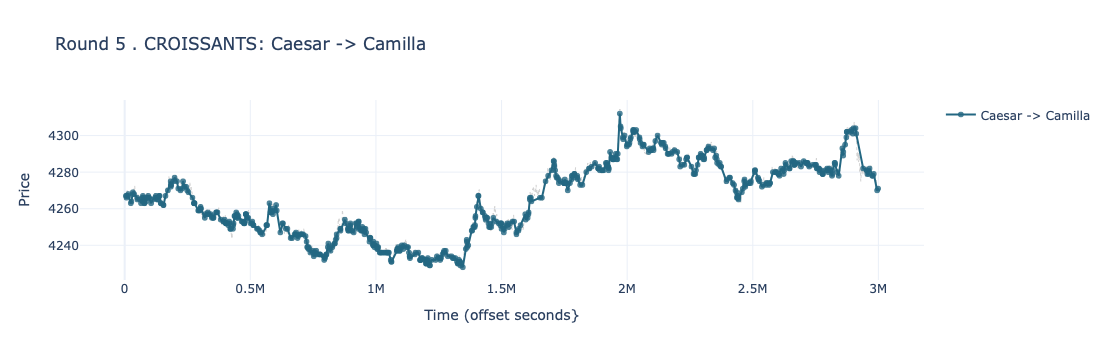

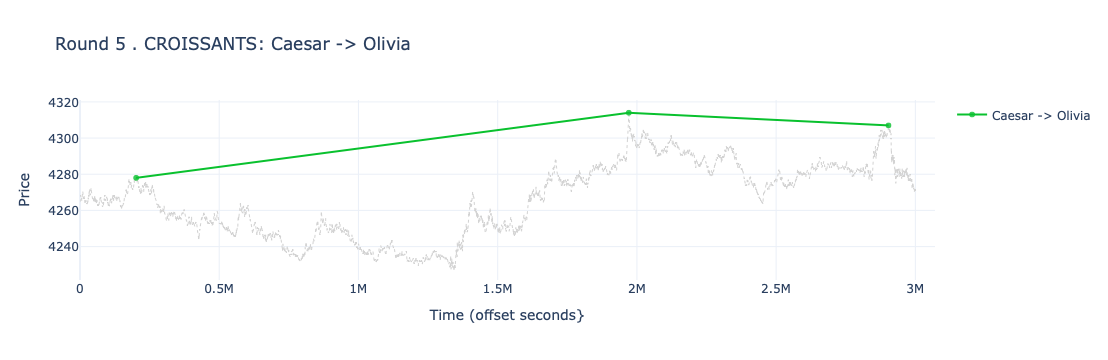

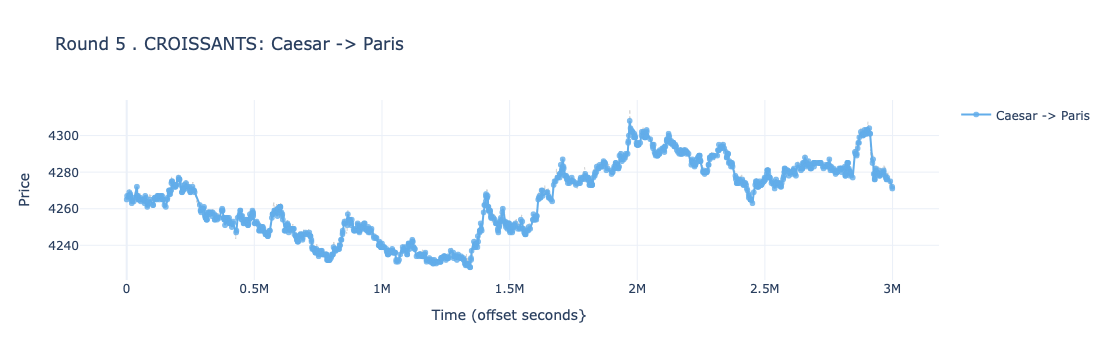

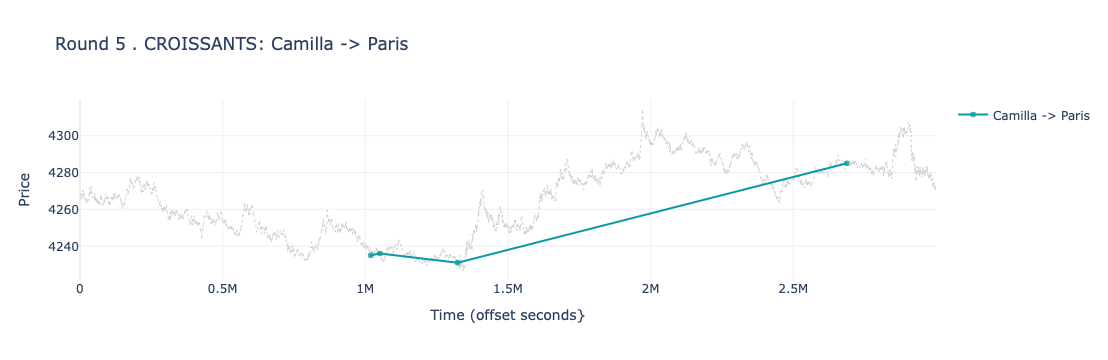

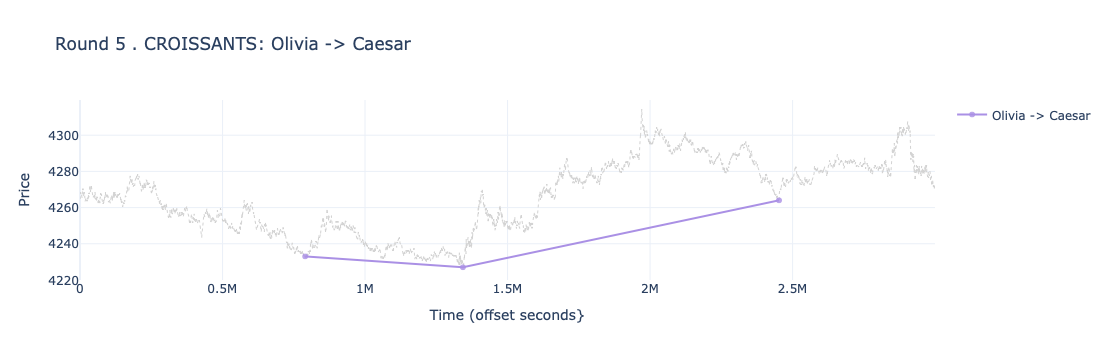

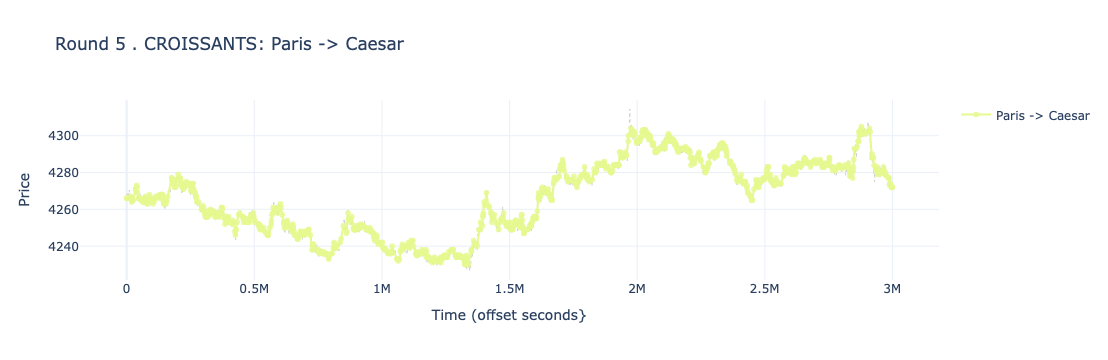

In [5]:
prices = pd.DataFrame()
trades = pd.DataFrame()

for day in days:
    dp = get_prices(day)
    dt = get_trades(day)
    offset = int(prices["timestamp"].iloc[-1]) if not prices.empty else 0
    dp["timestamp"] += offset
    dt["timestamp"] += offset
    prices = pd.concat([prices, dp], ignore_index=True)
    trades = pd.concat([trades, dt], ignore_index=True)

product = "CROISSANTS"
mask_p = prices["product"] == product
ts = prices.loc[mask_p, "timestamp"]

mid = get_product_prices(prices, product)

pt = trades[trades["symbol"] == product]

combos = sorted(set(zip(pt.buyer, pt.seller)))

colors = RandomColor(seed=0)
for buyer, seller in combos:
    sub = pt[(pt.buyer == buyer) & (pt.seller == seller)]
    if sub.empty:
        continue

    fig = make_subplots(specs=[[{"secondary_y": False}]])
    fig.update_layout(
    template="plotly_white",
    title_text=f"Round 5 . {product}: {buyer} -> {seller}",
    xaxis_title="Time (offset seconds}",
    yaxis_title="Price"
    )

    fig.add_trace(go.Scatter(
    x=ts, y=mid,
    name="Mid-Price",
    line=dict(color="lightgray", width=1, dash="dot"),
    showlegend=False
    ))

    fig.add_trace(go.Scatter(
    x=sub["timestamp"],
    y=sub["price"],
    mode="markers+lines",
    marker=dict(size=6, opacity=0.8, color=colors.generate()[0]),
    line=dict(width=2),
    name=f"{buyer} -> {seller}",

    customdata=sub["quantity"],
    hovertemplate=
        "Price: %{y}<br>" +
        "Qty: %{customdata}<br>" +
        "Time: %{x}<extra></extra>"
    ))



    fig.show()

In [ ]:
prices = pd.DataFrame()
trades = pd.DataFrame()

for day in days:
    dp = get_prices(day)
    dt = get_trades(day)
    offset = int(prices["timestamp"].iloc[-1]) if not prices.empty else 0
    dp["timestamp"] += offset
    dt["timestamp"] += offset
    prices = pd.concat([prices, dp], ignore_index=True)
    trades = pd.concat([trades, dt], ignore_index=True)
    
product = "SQUID_INK"
mask_p = prices["product"] == product
ts = prices.loc[mask_p, "timestamp"]
mid = get_product_prices(prices, product)

pt = trades[trades["symbol"] == product]

combos = sorted(set(zip(pt.buyer, pt.seller)))

colors = RandomColor(seed=0)
for buyer, seller in combos:
    sub = pt[(pt.buyer == buyer) & (pt.seller == seller)]
    if sub.empty:
        continue

    fig = make_subplots(specs=[[{"secondary_y": False}]])
    fig.update_layout(
    template="plotly_white",
    title_text=f"Round 5 . {product}: {buyer} -> {seller}",
    xaxis_title="Time (offset seconds}",
    yaxis_title="Price"
    )

    fig.add_trace(go.Scatter(
    x=ts, y=mid,
    name="Mid-Price",
    line=dict(color="lightgray", width=1, dash="dot"),
    showlegend=False
    ))

    fig.add_trace(go.Scatter(
    x=sub["timestamp"],
    y=sub["price"],
    mode="markers+lines",
    marker=dict(size=6, opacity=0.8, color=colors.generate()[0]),
    line=dict(width=2),
    name=f"{buyer} -> {seller}",

    customdata=sub["quantity"],
    hovertemplate=
        "Price: %{y}<br>" +
        "Qty: %{customdata}<br>" +
        "Time: %{x}<extra></extra>"
    ))



    fig.show()